In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
from IPython.display import clear_output

os.chdir("..")

from crypto_trader.data import get_stream_data_sizes, prep_sim_data

In [37]:
data_path = 'E:/data/streams/XRPEUR/'
dataset_filename = 'classification_dataset_1min.pkl'

In [17]:
dataset = []
print(data_path+dataset_filename)
if os.path.isfile(data_path+dataset_filename):
    print("Yeah")
    file = open(data_path+dataset_filename, 'rb')
    # save dataset
    dataset = pickle.load(file)

E:/data/streams/XRPEUR/classification_dataset.pkl
Yeah


EOFError: Ran out of input

In [18]:
index = 0

num_numeric_features, image_size, stream_dates, stream_times = \
    get_stream_data_sizes(data_path, half=True)

sim_numeric_data, sim_image_data, buy_rewards, sim_prices, weightedAvgPrice = \
    prep_sim_data(index, stream_dates, stream_times, data_path)

In [19]:
def display_step_imgs(sim_image_data, step_num, widget_box):
    clear_output()
    display(widget_box)
    
    plt.imshow(
        np.concatenate(
            [sim_image_data[step_num, :, :, 0], sim_image_data[step_num, :, :, 1]],
            axis=1
        ),
        cmap='gray', vmin=0, vmax=255
    )
    plt.show()

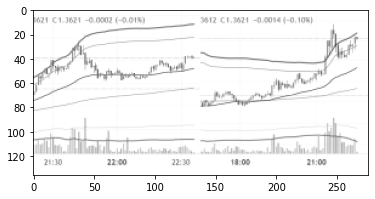

In [34]:
def on_step_change(change):
    display_step_imgs(sim_image_data, change['new'], widget_box)
    
    
def on_class_add_click(button_dict):
    dataset.append([
        sim_image_data[step_slider.value],
        class_type.value,
        step_slider.value
    ])
    
    
def change_slider_value(button_dict):
    button_desc = button_dict.description
    change_amount = int(button_desc[-3:].strip())
    
    if 'down' in button_desc:
        change_amount = change_amount*-1
        
    step_slider.value = step_slider.value + change_amount
    

classes = ['top', 'bottom', 'pre_break_up', 'brake_up', 'pre_break_down', 'break_down']

step_slider = widgets.IntSlider(
    value=7,
    min=0,
    max=len(sim_image_data),
    step=20,
    description='Step number',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

class_type = widgets.Dropdown(
    options=classes,
    value=classes[0],
    description='Class type',
    disabled=False,
)

class_add_button = widgets.Button(
    description='Add',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Add me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)


nav_buttons = [ widgets.Button(
    description=d,
    disabled=False,
    button_style='info'
) for d in ['down 500', 'down 100', 'down 25', 'down 10', 'up 500', 'up 100', 'up 25', 'up 10']]

[b.on_click(change_slider_value) for b in nav_buttons]

class_add_button.on_click(on_class_add_click)
step_slider.observe(on_step_change, names='value')

widget_box = VBox([
    HBox([step_slider, class_type, class_add_button]),
    HBox(nav_buttons[:int(len(nav_buttons)/2)]),
    HBox(nav_buttons[int(len(nav_buttons)/2):])
])

display(widget_box)

In [36]:
print(len(dataset))

0


In [35]:
dataset = [] #dataset[:]

In [28]:
[entry.append(index) for entry in dataset if len(entry) == 3]; # add dataset number to newly added entries

In [30]:
print(len(dataset[0]), dataset[0][1], dataset[0][2], dataset[0][3])

4 top 8020 0


In [31]:
# save dataset
with open(data_path+dataset_filename, 'wb') as f:
    pickle.dump(dataset, f)